How do we time execution of functions
=====================================

Here we test various implementation of a naive primality test:
- trial division of all integers below n with complexity O(n) (`is_prime1`)
- second trial division of all integers below sqrt(n) with complexity O(sqrt(n)) (`is_prime2`) 
- hence trial division but testing only odd numbers with complexity O(sqrt(n)) (`is_prime3`)

Note that these are not serious functions for testing primality of large numbers! They are only efficient to discard numbers with small divisors. The aim of this worksheet is just to introduce the notion of running time and complexity.

In [1]:
import timeit                     # for benchmarks
import matplotlib.pyplot as plt   # for plots

In [2]:
# the string below is the code you have to write
# to define the function is_prime1. It is done inside
# a string because of the way timeit is working
code1="""
def is_prime1(n):
    for i in range(2, n):
        if n%i == 0:
            return False
    return True
"""

In [3]:
# code for is_prime2
code2="""
def is_prime2(n):
    i = 2
    while i*i <= n:
        if n%i == 0:
            return False
        i = i + 1
    return True
"""

In [4]:
X = range(2, 200)

In [5]:
# compute the execution time for is_prime1
time1 = []
for n in X:
    t = timeit.timeit('is_prime1(%d)' % n, number=10000, setup=code1)
    time1.append(t)

In [6]:
# compute the execution time for is_prime2
time2 = []
for n in X:
    t = timeit.timeit('is_prime2(%d)' % n, number=10000, setup=code2)
    time2.append(t)

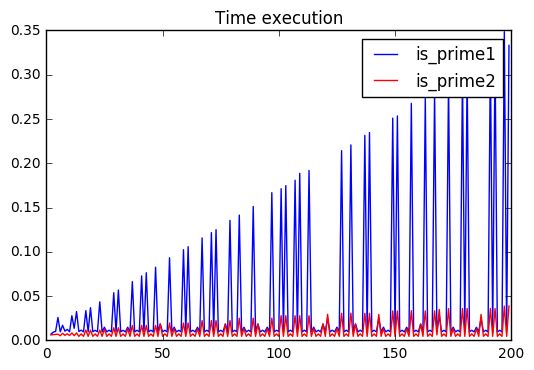

In [7]:
plt.plot(X, time1, 'b', label='is_prime1')
plt.plot(X, time2, 'r', label='is_prime2')
plt.legend()
plt.title('Time execution')
plt.show()

In [8]:
# code for is_prime3
# is_prime2 is much better but we can still do twice faster
# using still trial division...
code3="""
def is_prime3(n):
    if n&1 == 0:
         return n == 2
    i = 3
    while i*i <= n:
        if n%i == 0:
            return False
        i = i + 2
    return True
    """

In [9]:
X = range(5000,5200)

In [10]:
# compute the execution time for is_prime2
time2 = []
for n in X:
    t = timeit.timeit('is_prime2(%d)' % n, number=10000, setup=code2)
    time2.append(t)

In [11]:
# compute the execution time for is_prime2
time3 = []
for n in X:
    t = timeit.timeit('is_prime3(%d)' % n, number=10000, setup=code3)
    time3.append(t)

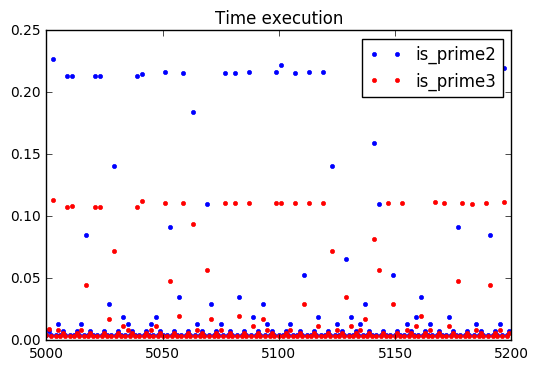

In [12]:
plt.plot(X, time2, '.b', label='is_prime2')
plt.plot(X, time3, '.r', label='is_prime3')
plt.legend()
plt.title('Time execution')
plt.show()

In [13]:
# to transform a string into Python code you can use
# the compile and eval functions
# the code below makes available the is_prime1,
# is_prime2 and is_prime3 functions...
c1 = compile(code1, '/tmp/code1.pyc', 'exec')
eval(c1)
c2 = compile(code2, '/tmp/code2.pyc', 'exec')
eval(c2)
c3 = compile(code3, '/tmp/code3.pyc', 'exec')
eval(c3)

In [14]:
# we can then check that they agree
all(is_prime1(n) == is_prime2(n) == is_prime3(n) for n in range(2,1000))

True